In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = [224, 224]

train_path = 'D:\data\Dataset\Train'
valid_path = 'D:\data\Dataset\Test'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('D:\data\Dataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory('D:\data\Dataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [11]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21932\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 21s 2s/step - loss: 0.5759 - accuracy: 0.6947 - val_loss: 0.6949 - val_accuracy: 0.5224
Epoch 2/10
13/13 [==============================] - 21s 2s/step - loss: 0.4834 - accuracy: 0.7740 - val_loss: 0.6822 - val_accuracy: 0.5522
Epoch 3/10
13/13 [==============================] - 21s 2s/step - loss: 0.4133 - accuracy: 0.7981 - val_loss: 0.6840 - val_accuracy: 0.6343
Epoch 4/10
13/13 [==============================] - 21s 2s/step - loss: 0.4136 - accuracy: 0.8245 - val_loss: 0.7544 - val_accuracy: 0.5597
Epoch 5/10
13/13 [==============================] - 21s 2s/step - loss: 0.3273 - accuracy: 0.8750 - val_loss: 0.5638 - val_accuracy: 0.6940
Epoch 6/10
13/13 [==============================] - 21s 2s/step - loss: 0.3632 - accuracy: 0.8702 - val_loss: 0.5024 - val_accuracy: 0.7463
Epoch 7/10
13/13 [==============================] - 21s 2s/step - loss: 0.2786 - accuracy: 0.8990 - val_loss: 0.3648 - val_accuracy: 0.8134
Epoch 8/10
13/13 [==

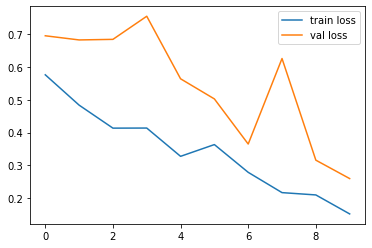

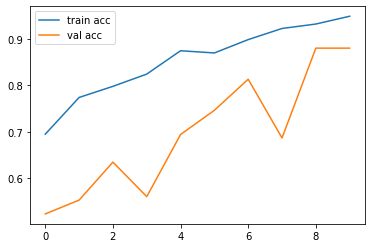

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [16]:
y_pred = model.predict(test_set)
y_pred

array([[9.53200519e-01, 4.67994474e-02],
       [9.92075324e-01, 7.92471319e-03],
       [9.61964548e-01, 3.80354039e-02],
       [9.98072743e-01, 1.92724087e-03],
       [7.92572200e-01, 2.07427740e-01],
       [9.96574938e-01, 3.42503726e-03],
       [1.85636923e-01, 8.14363062e-01],
       [2.13830963e-01, 7.86169052e-01],
       [9.99814451e-01, 1.85586221e-04],
       [7.32367814e-01, 2.67632246e-01],
       [8.76285553e-01, 1.23714410e-01],
       [9.95036662e-02, 9.00496364e-01],
       [3.46560359e-01, 6.53439581e-01],
       [9.97566223e-01, 2.43384507e-03],
       [8.42070878e-01, 1.57929152e-01],
       [9.84609604e-01, 1.53904473e-02],
       [9.23876345e-01, 7.61236772e-02],
       [9.68548715e-01, 3.14513259e-02],
       [4.70359027e-01, 5.29640973e-01],
       [4.07499939e-01, 5.92500091e-01],
       [3.45870256e-01, 6.54129744e-01],
       [6.54022634e-01, 3.45977426e-01],
       [2.20317587e-01, 7.79682457e-01],
       [1.96051419e-01, 8.03948581e-01],
       [3.099930

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [19]:
from tensorflow.keras.models import load_model
model.save('model_cnn.h5')